c:\Users\Joel\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Baseline Test Accuracy: 0.9793000221252441
L1 Regularization Test Accuracy: 0.891700029373169
L2 Regularization Test Accuracy: 0.95660001039505


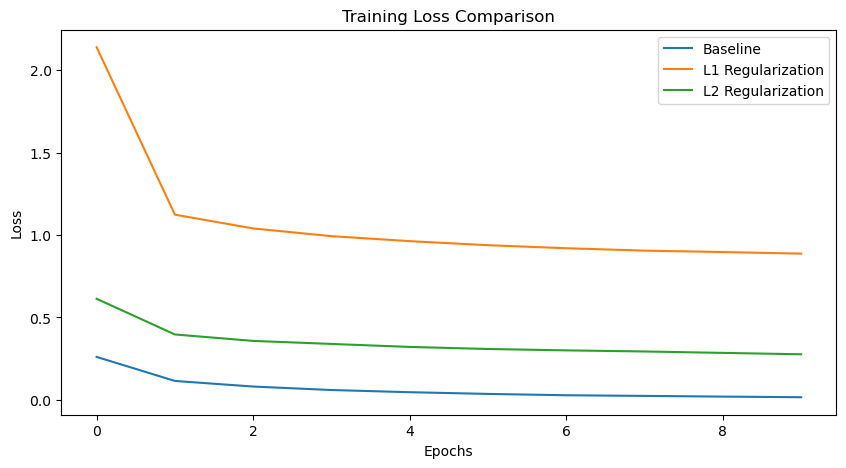

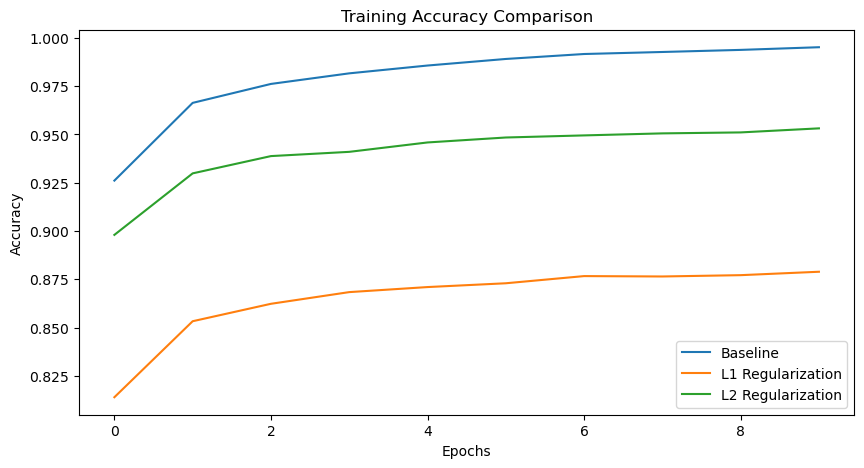

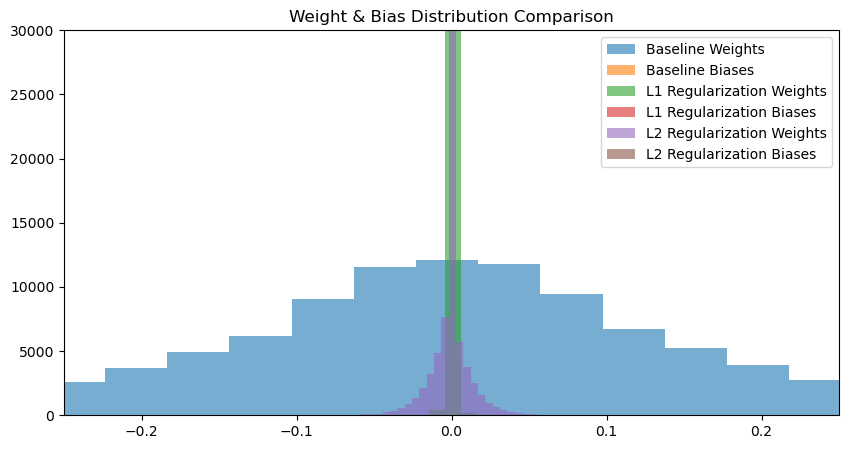

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Function to build model with optional regularization
def build_model(regularizer=None):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train baseline model (No Regularization)
baseline_model = build_model()
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

# Train model with L1 regularization
l1_model = build_model(l1(0.01))
l1_history = l1_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

# Train model with L2 regularization
l2_model = build_model(l2(0.01))
l2_history = l2_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

# Evaluate models on test data
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test, verbose=0)
l1_test_loss, l1_test_acc = l1_model.evaluate(x_test, y_test, verbose=0)
l2_test_loss, l2_test_acc = l2_model.evaluate(x_test, y_test, verbose=0)

# Print final test accuracy
print("Baseline Test Accuracy:", baseline_test_acc)
print("L1 Regularization Test Accuracy:", l1_test_acc)
print("L2 Regularization Test Accuracy:", l2_test_acc)

# Plot training loss comparison
plt.figure(figsize=(10,5))
plt.plot(baseline_history.history['loss'], label='Baseline')
plt.plot(l1_history.history['loss'], label='L1 Regularization')
plt.plot(l2_history.history['loss'], label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Comparison')
plt.show()

# Plot training accuracy comparison
plt.figure(figsize=(10,5))
plt.plot(baseline_history.history['accuracy'], label='Baseline')
plt.plot(l1_history.history['accuracy'], label='L1 Regularization')
plt.plot(l2_history.history['accuracy'], label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Comparison')
plt.show()

# Function to plot weight and bias distributions
def plot_weights(model, title):
    weights, biases = model.layers[1].get_weights()
    plt.hist(weights.flatten(), bins=50, alpha=0.6, label=f'{title} Weights')
    plt.hist(biases.flatten(), bins=50, alpha=0.6, label=f'{title} Biases')

plt.figure(figsize=(10,5))
plot_weights(baseline_model, 'Baseline')
plot_weights(l1_model, 'L1 Regularization')
plot_weights(l2_model, 'L2 Regularization')
plt.xlim(-0.25, 0.25)
plt.ylim(0, 30000)
plt.legend()
plt.title('Weight & Bias Distribution Comparison')
plt.show()
